In [2]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

In [3]:
# necessary package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('Downloads/creditcard.csv')

In [5]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
print(data.shape)

(284807, 31)


In [8]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [9]:
data=data.sample(frac=0.1,random_state=0)
print(data.shape)

(28481, 31)


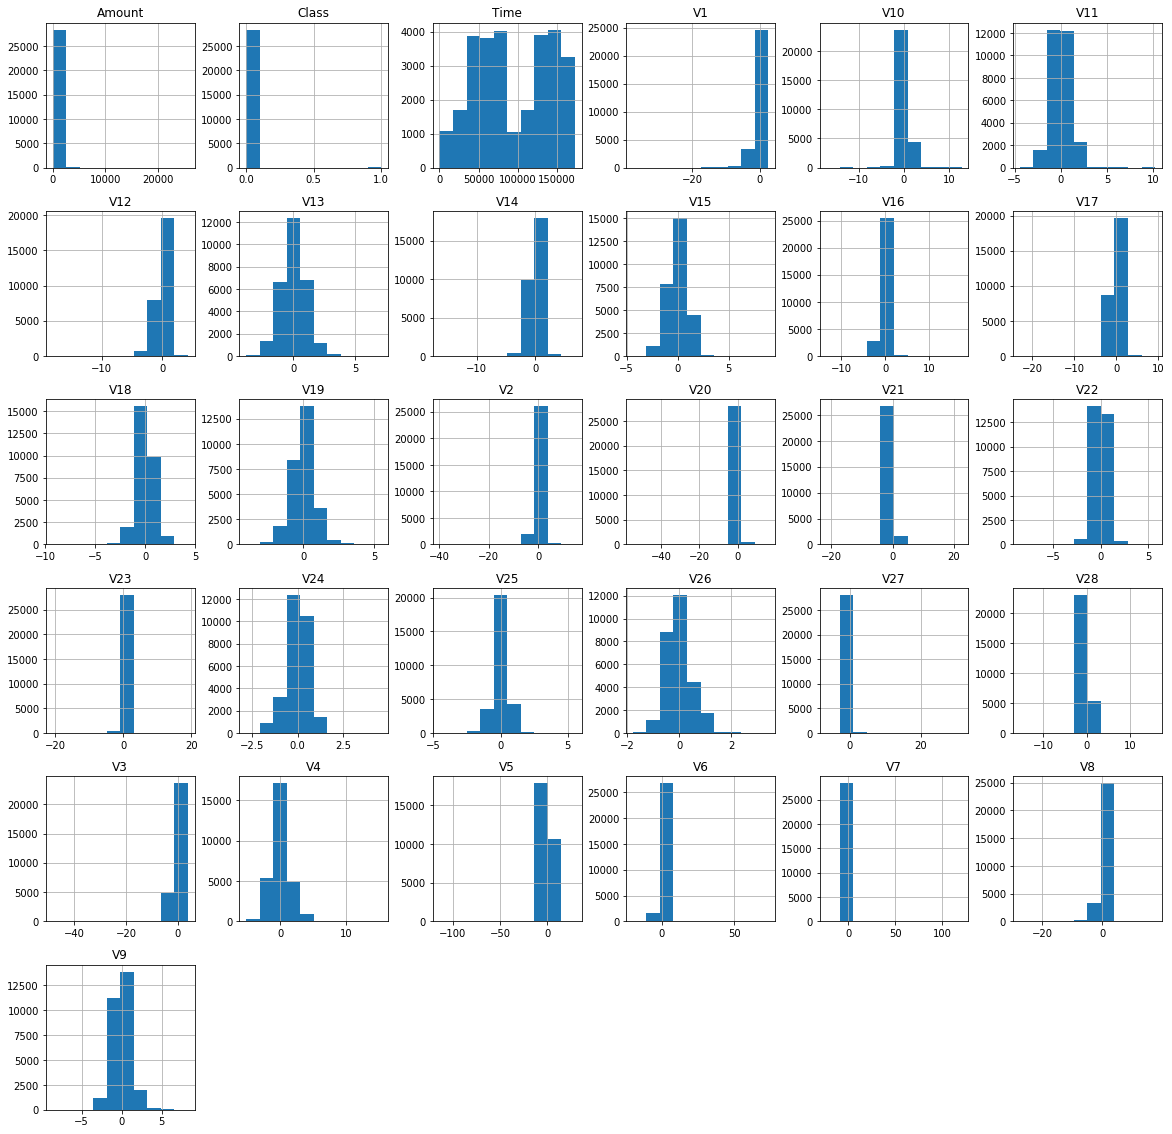

In [10]:
#histogram of each parameter
data.hist(figsize=(20,20))
plt.show()

In [11]:
#number of fradulent cases
fraud=data[data['Class']==1]
valid=data[data['Class']==0]

outlier_fraction=len(fraud)/float(len(valid))
print(outlier_fraction)
print('Fraud cases: {}'.format(len(fraud)))
print('Valid cases: {}'.format(len(valid)))

0.0019348483782452685
Fraud cases: 55
Valid cases: 28426


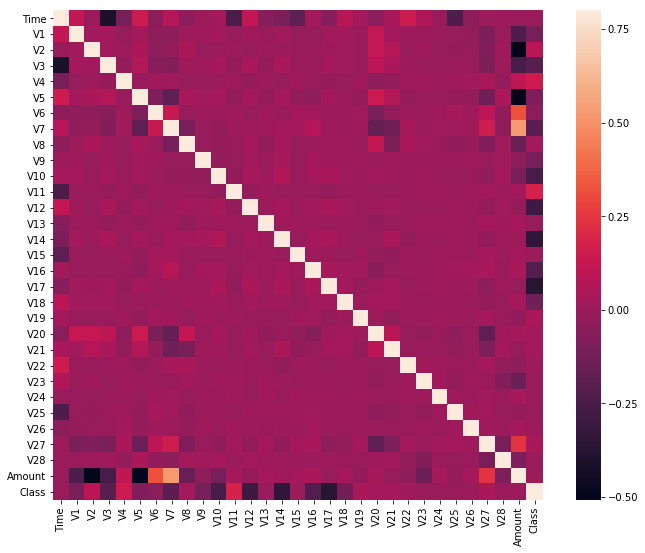

In [12]:
#correlation matrix
corrmat=data.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

In [13]:
X=data.drop('Class', axis=1)

In [14]:
y=data['Class']

In [15]:
print(X.shape)

(28481, 30)


In [17]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,...,0.186409,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,40.00
255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,...,-0.096502,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,1.98
244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,...,0.419835,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,96.00
63919,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,...,-0.987790,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,308.00
11475,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,...,-0.126871,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,5.00


In [20]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor 



In [27]:
#define a random state
state=1
#define outlier detection methods
classifiers={"Isolation Forest": IsolationForest(max_samples=len(X), contamination=outlier_fraction, random_state=state), 
             "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction)}

In [29]:
#Fit the model
n_outliers=len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #fit the data and tag outliers
    if clf_name== "Local Outlier Factor":
        y_pred=clf.fit_predict(X)
        scores_pred=clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred=clf.decision_function(X)
        y_pred=clf.predict(X)
    #Reshape such that 0 is valid and 1 is invalid
    y_pred[y_pred==1]=0
    y_pred[y_pred==-1]=1
    
    n_errors=(y_pred!=y).sum()
    
    #Run classification matrix
    print('{},{}'.format(clf_name, n_errors))
    print(accuracy_score(y,y_pred))
    print(classification_report(y,y_pred))
        

/Users/yashikachugh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/Users/yashikachugh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest,73
0.9974368877497279
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28426
           1       0.34      0.35      0.34        55

   micro avg       1.00      1.00      1.00     28481
   macro avg       0.67      0.67      0.67     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor,109
0.9961728871879498
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28426
           1       0.02      0.02      0.02        55

   micro avg       1.00      1.00      1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



In [ ]:
# 1 out of 3 accuracy in case of fraud